# Imports BEGINNER

Esta tabla contiene la información de los imports a nivel de fichero (módulo). --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'import__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('imports')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-06-14 13:20:18.308320 Data cache files found ...
2024-06-14 13:20:18.310355 Data cache files successfully loaded!!
The dataset contains 7124 (39.09%) instances for BEGINNER class and 11102 (60.91%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'imports'
TABLE_FEATURES = ['import__number_imports', 'import__module_imports_pct', 'import__average_imported_modules', 'import__from_imports_pct', 'import__average_from_imported_modules', 'import__average_as_in_imported_modules', 'import__local_imports_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (7124, 7)
As we can see the downloaded data contains a total of 7124 instances. For each instance we have 7 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7124 entries, 0 to 7123
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   import__number_imports                  7124 non-null   int64  
 1   import__module_imports_pct              7124 non-null   float64
 2   import__average_imported_modules        7124 non-null   float64
 3   import__from_imports_pct                7124 non-null   float64
 4   import__average_from_imported_modules   7124 non-null   float64
 5   import__average_as_in_imported_modules  7124 non-null   float64
 6   import__local_imports_pct               7124 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 445.2 KB
None


Cómo podemos ver la tabla está compuesta por 7 variables numéricas y una de tipo objeto. 

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [93.49%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

import__number_imports                    0
import__module_imports_pct                0
import__average_imported_modules          0
import__from_imports_pct                  0
import__average_from_imported_modules     0
import__average_as_in_imported_modules    0
import__local_imports_pct                 0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [6]:
print_empty_cols(X)

import__number_imports
----------------------
0 instancias no tienen un valor para la columna import__number_imports


import__module_imports_pct
--------------------------
0 instancias no tienen un valor para la columna import__module_imports_pct


import__average_imported_modules
--------------------------------
0 instancias no tienen un valor para la columna import__average_imported_modules


import__from_imports_pct
------------------------
0 instancias no tienen un valor para la columna import__from_imports_pct


import__average_from_imported_modules
-------------------------------------
0 instancias no tienen un valor para la columna import__average_from_imported_modules


import__average_as_in_imported_modules
--------------------------------------
0 instancias no tienen un valor para la columna import__average_as_in_imported_modules


import__local_imports_pct
-------------------------
0 instancias no tienen un valor para la columna import__local_imports_pct




### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
import__number_imports,7124.0,3.406654,5.278046,0.0,0.0,1.0,5.000000,46.0
import__module_imports_pct,7124.0,0.304292,0.386904,0.0,0.0,0.0,0.571429,1.0
import__average_imported_modules,7124.0,0.504431,0.579781,0.0,0.0,0.0,1.000000,6.0
import__from_imports_pct,7124.0,0.326393,0.397314,0.0,0.0,0.0,0.687500,1.0
import__average_from_imported_modules,7124.0,0.796060,1.163002,0.0,0.0,0.0,1.142857,8.0
import__average_as_in_imported_modules,7124.0,0.009739,0.061771,0.0,0.0,0.0,0.000000,1.0
import__local_imports_pct,7124.0,0.466580,0.495150,0.0,0.0,0.0,1.000000,1.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "import__number_imports": [(0, 0), (1, 1), (1, 7), (7, inf)],  # min: 0 max: 46 
    "import__module_imports_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1), (1, 1)],  # min: 0.0 max: 1.0 
    "import__average_imported_modules": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 6 
    "import__from_imports_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1), (1, 1)],  # min: 0.0 max: 1.0 
    "import__average_from_imported_modules": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 8 
    "import__average_as_in_imported_modules": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0 
    "import__local_imports_pct": [(0.0, 0.0), (0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0 
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['import__number_imports'], 10))
print(get_statistics(X_copy, ['import__module_imports_pct'], 10))
print(get_statistics(X_copy, ['import__average_imported_modules'], 10))
print(get_statistics(X_copy, ['import__from_imports_pct'], 10))
print(get_statistics(X_copy, ['import__average_from_imported_modules'], 10))
print(get_statistics(X_copy, ['import__average_as_in_imported_modules'], 10))
print(get_statistics(X_copy, ['import__local_imports_pct'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['import__average_imported_modules', 'import__module_imports_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))

--- SINGLE FEATURE ---
import__number_imports  count  percentage
                 [0_0]   2631   36.931499
                 [1_7)   2125   29.828748
               [7_inf]   1269   17.813026
                 [1_1]   1099   15.426727

import__module_imports_pct  count  percentage
                 [0.0_0.0]   3729   52.344189
                     [1_1]   1205   16.914655
                 [0.0_0.5)   1168   16.395284
                   [0.5_1)   1022   14.345873

import__average_imported_modules  count  percentage
                       [0.0_0.0]   3729   52.344189
                       [0.0_inf]   3395   47.655811

import__from_imports_pct  count  percentage
               [0.0_0.0]   3836   53.846154
                 [0.5_1)   1511   21.209994
                   [1_1]   1098   15.412690
               [0.0_0.5)    679    9.531162

import__average_from_imported_modules  count  percentage
                            [0.0_0.0]   3836   53.846154
                            [0.0_inf]   328

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (7124, 7)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

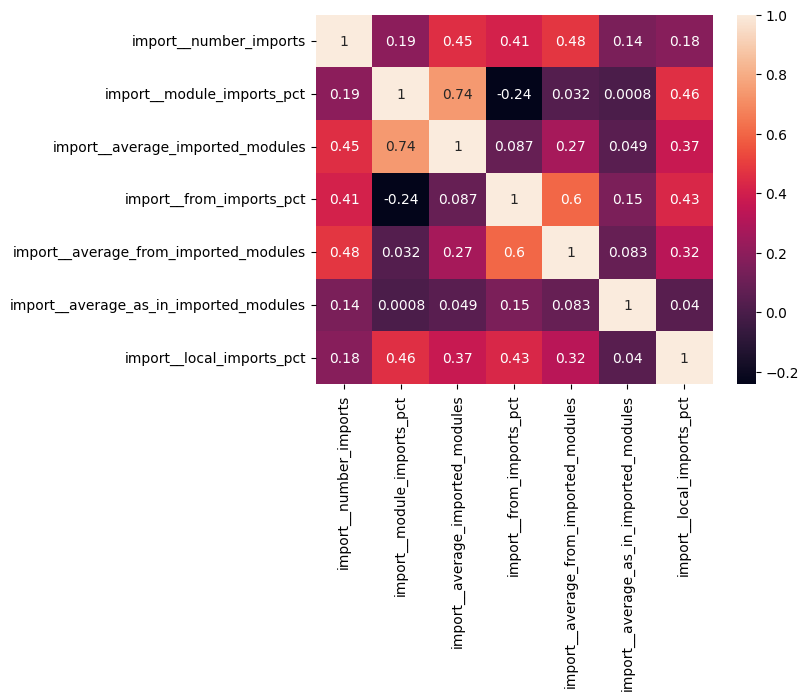

In [10]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 7 variable (3 porcentuales y 4 numericas y una categorica)

### Variable number_imports (1/7)
Esta variable es de tipo numérica y nos indica el número imports definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 46. Con una media de 3.4.

<Axes: ylabel='import__number_imports'>

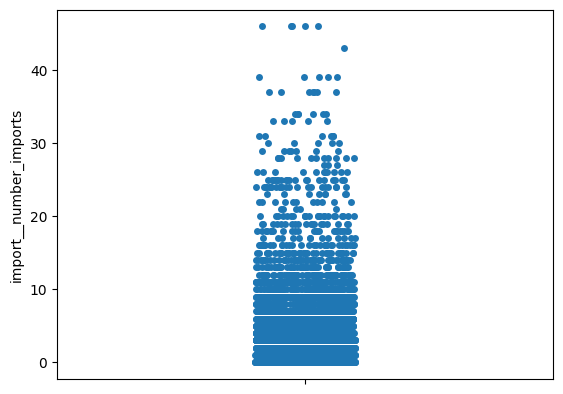

In [11]:
sns.stripplot(X['import__number_imports'])

In [12]:
print_outliers_for_df_column(X, 'import__number_imports')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.48291189659885914
Rango valores atípicos extremos (Tukey): [-15.0,20.0]
Rango valores atípicos leves (Tukey): [-7.5,12.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-1.383631248080799,56.75652995744688]
-3.0IQR: 0 instancias tienen un valor para import__number_imports inferior a -15.0 (Q1-3*IQR) para import__number_imports. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__number_imports inferior a -7.5 (Q1-1.5*IQR) para import__number_imports. Representando un 0.0% del total de instancias.
+1.5IQR: 402 instancias tienen un valor para import__number_imports superior a 12.5 (Q3+1.5*IQR) para import__number_imports. Representando un 5.643% del total de instancias.
+3.0IQR: 137 instancias tienen un valor para import__number_imports superior a 20.0 (Q3-3*IQR) para import__number_imports. Representando un 1.923% del total de instancias.
L: 0 instancias tienen un valor para impo

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 20 (Con un MC de 48 usamos Tuckey Extremo)

In [13]:
X[X['import__number_imports'] > 20].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,137.000000,137.000000,137.0,137.000000,137.000000,137.000000,137.000000
mean,28.058393,0.363049,1.0,0.636951,1.848644,0.032259,0.331237
std,5.971459,0.219961,0.0,0.219961,0.613224,0.044877,0.457430
min,21.000000,0.080000,1.0,0.193548,1.025000,0.000000,0.000000
25%,24.000000,0.160000,1.0,0.486486,1.409091,0.000000,0.000000
50%,26.000000,0.392857,1.0,0.607143,1.695652,0.000000,0.000000
75%,31.000000,0.513514,1.0,0.840000,2.416667,0.073171,1.000000
max,46.000000,0.806452,1.0,0.920000,3.250000,0.142857,1.000000


### Variable average_imported_modules (2/7)
Esta variable representa el número medio de alias importados en cada clausula import. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 6. Con una media de 0.50.

<Axes: ylabel='import__average_imported_modules'>

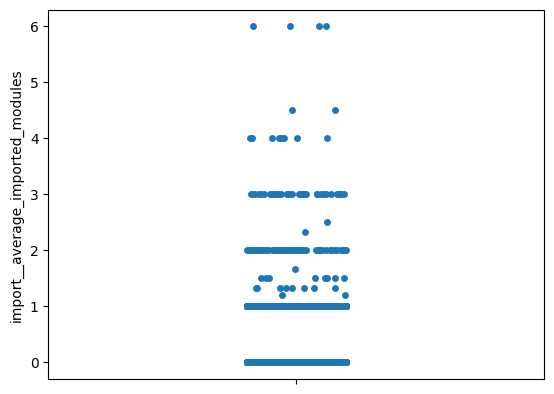

In [14]:
sns.stripplot(X['import__average_imported_modules'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente. 

In [15]:
print_outliers_for_df_column(X, 'import__average_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8192979991436005
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.08525761094175155,40.75187877179185]
-3.0IQR: 0 instancias tienen un valor para import__average_imported_modules inferior a -3.0 (Q1-3*IQR) para import__average_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_imported_modules inferior a -1.5 (Q1-1.5*IQR) para import__average_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 51 instancias tienen un valor para import__average_imported_modules superior a 2.5 (Q3+1.5*IQR) para import__average_imported_modules. Representando un 0.7159% del total de instancias.
+3.0IQR: 6 instancias tienen un valor para import__average_imported_modules superior a 4.0 (Q3-3*IQR) para import__average_imported_modules. Representando un 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 4.0 (Con un MC de 81 usamos Tuckey Extremo)

In [16]:
X[X['import__average_imported_modules'] > 4.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000
mean,1.833333,0.750000,5.500000,0.250000,0.500000,0.0,0.500000
std,0.408248,0.273861,0.774597,0.273861,0.547723,0.0,0.547723
min,1.000000,0.500000,4.500000,0.000000,0.000000,0.0,0.000000
25%,2.000000,0.500000,4.875000,0.000000,0.000000,0.0,0.000000
50%,2.000000,0.750000,6.000000,0.250000,0.500000,0.0,0.500000
75%,2.000000,1.000000,6.000000,0.500000,1.000000,0.0,1.000000
max,2.000000,1.000000,6.000000,0.500000,1.000000,0.0,1.000000


### IMPORTANTE
Mirar estos 6 imports

### Variable average_from_imported_modules (3/7)
Esta variable representa el número medio de imports con la clausula From. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 8.0. Con una media de 0.79.

<Axes: ylabel='import__average_from_imported_modules'>

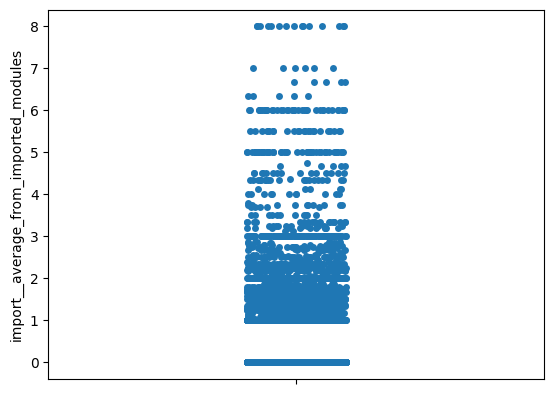

In [17]:
sns.stripplot(X['import__average_from_imported_modules'])

In [18]:
print_outliers_for_df_column(X, 'import__average_from_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4062675811024981
Rango valores atípicos extremos (Tukey): [-3.428571581840515,4.5714287757873535]
Rango valores atípicos leves (Tukey): [-1.7142857909202576,2.857142984867096]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.4135652455625802,9.849331045831809]
-3.0IQR: 0 instancias tienen un valor para import__average_from_imported_modules inferior a -3.428571581840515 (Q1-3*IQR) para import__average_from_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_from_imported_modules inferior a -1.7142857909202576 (Q1-1.5*IQR) para import__average_from_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 395 instancias tienen un valor para import__average_from_imported_modules superior a 2.857142984867096 (Q3+1.5*IQR) para import__average_from_imported_modules. Representando un 5.545% del total de instancias.
+3.0IQR: 145 instancias tien

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 4.57 (Con un MC de 40 usamos Tuckey Extremo)

In [19]:
X[X['import__average_from_imported_modules'] > 4.57].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,6.034483,0.523826,0.793103,0.476174,5.821264,0.007471,0.727586
std,3.895178,0.318544,0.406485,0.318544,0.941323,0.018375,0.437914
min,1.000000,0.000000,0.000000,0.111111,4.666667,0.000000,0.000000
25%,3.000000,0.333333,1.000000,0.200000,5.000000,0.000000,0.000000
50%,6.000000,0.625000,1.000000,0.375000,5.500000,0.000000,1.000000
75%,8.000000,0.800000,1.000000,0.666667,6.000000,0.000000,1.000000
max,20.000000,0.888889,1.000000,1.000000,8.000000,0.055556,1.000000


### Variable average_as_in_imported_modules (4/7)
Esta variable es de tipo numérica y nos indica el número medio de import con la cláusula as. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 1. Con una media de 0.009.

<Axes: ylabel='import__average_as_in_imported_modules'>

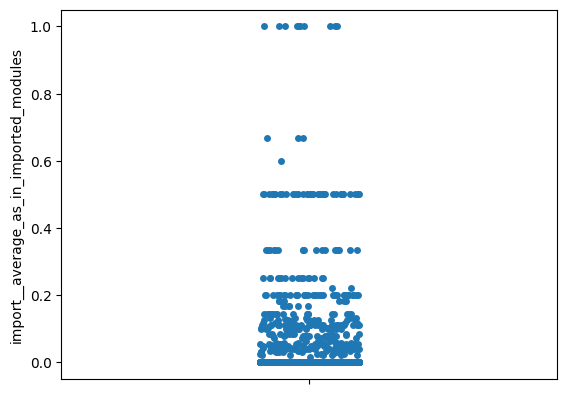

In [20]:
sns.stripplot(X['import__average_as_in_imported_modules'])

In [21]:
print_outliers_for_df_column(X, 'import__average_as_in_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.916296460340238
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para import__average_as_in_imported_modules inferior a 0.0 (Q1-3*IQR) para import__average_as_in_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_as_in_imported_modules inferior a 0.0 (Q1-1.5*IQR) para import__average_as_in_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 365 instancias tienen un valor para import__average_as_in_imported_modules superior a 0.0 (Q3+1.5*IQR) para import__average_as_in_imported_modules. Representando un 5.124% del total de instancias.
+3.0IQR: 365 instancias tienen un valor para import__average_as_in_imported_modules superior a 0.0 (Q3-3*IQR) para import__average_as_in_imported_modules. Rep

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.0 (Con un MC de 91 usamos U)

In [22]:
X[X['import__average_as_in_imported_modules'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,13.032877,0.329395,0.819178,0.670605,1.978410,0.190089,0.615007
std,9.407679,0.244316,0.444953,0.244316,1.322905,0.200723,0.455688
min,1.000000,0.000000,0.000000,0.166667,1.000000,0.017241,0.000000
25%,6.000000,0.130435,1.000000,0.500000,1.025000,0.055556,0.000000
50%,11.000000,0.333333,1.000000,0.666667,1.500000,0.111111,1.000000
75%,18.000000,0.500000,1.000000,0.869565,2.222222,0.200000,1.000000
max,46.000000,0.833333,3.000000,1.000000,6.000000,1.000000,1.000000


### Variable module_imports_pct (5/7)
Esta variable representa la proporción de import simples del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.30.

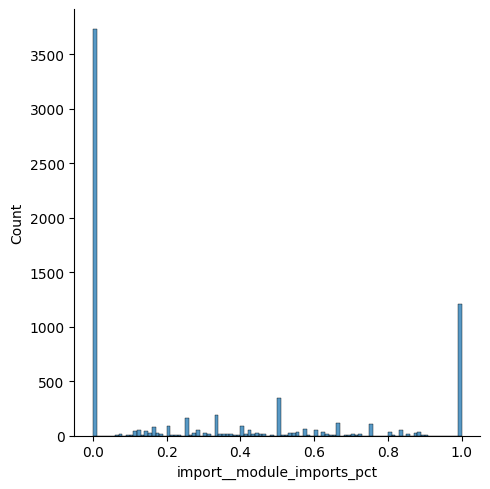

In [23]:
sns.displot(X['import__module_imports_pct'], bins=[i / 100 for i in range(0, 101)])

In [24]:
print_outliers_for_df_column(X, 'import__module_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.3088034391403198
Rango valores atípicos extremos (Tukey): [-1.7142857909202576,2.2857143878936768]
Rango valores atípicos leves (Tukey): [-0.8571428954601288,1.428571492433548]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.29084561881706866,3.51924036466457]
-3.0IQR: 0 instancias tienen un valor para import__module_imports_pct inferior a -1.7142857909202576 (Q1-3*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__module_imports_pct inferior a -0.8571428954601288 (Q1-1.5*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__module_imports_pct superior a 1.428571492433548 (Q3+1.5*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__module_imports_pct superior a 2.2857143878936

In [25]:
X[X['import__module_imports_pct'] == 1.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,1205.000000,1205.0,1205.000000,1205.0,1205.0,1205.0,1205.000000
mean,1.894606,1.0,1.061189,0.0,0.0,0.0,0.868524
std,1.338671,0.0,0.343305,0.0,0.0,0.0,0.337760
min,1.000000,1.0,1.000000,0.0,0.0,0.0,0.000000
25%,1.000000,1.0,1.000000,0.0,0.0,0.0,1.000000
50%,1.000000,1.0,1.000000,0.0,0.0,0.0,1.000000
75%,2.000000,1.0,1.000000,0.0,0.0,0.0,1.000000
max,11.000000,1.0,6.000000,0.0,0.0,0.0,1.000000


### IMPORTANTE
El 52% de los imports tienen module_imports_pct = 0.0

### Variable from_imports_pct (6/7)
Esta variable representa la proporción de imports que usan la clausula From en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.32.


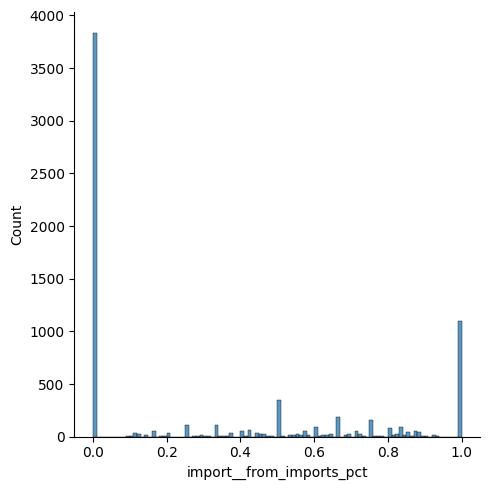

In [26]:
sns.displot(X['import__from_imports_pct'], bins=[i / 100 for i in range(0, 101)])

In [27]:
print_outliers_for_df_column(X, 'import__from_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.27629342675209045
Rango valores atípicos extremos (Tukey): [-2.0625,2.75]
Rango valores atípicos leves (Tukey): [-1.03125,1.71875]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.39209334796946776,3.801616130273311]
-3.0IQR: 0 instancias tienen un valor para import__from_imports_pct inferior a -2.0625 (Q1-3*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__from_imports_pct inferior a -1.03125 (Q1-1.5*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__from_imports_pct superior a 1.71875 (Q3+1.5*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__from_imports_pct superior a 2.75 (Q3-3*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
L: 0 instanci

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [28]:
X[(X['import__from_imports_pct'] > 0.0) & (X['import__from_imports_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,8.760274,0.439624,1.057001,0.560376,1.820670,0.019806,0.595021
std,6.594817,0.211214,0.345573,0.211214,1.168431,0.074640,0.479497
min,2.000000,0.066667,1.000000,0.090909,1.000000,0.000000,0.000000
25%,4.000000,0.250000,1.000000,0.428571,1.000000,0.000000,0.000000
50%,7.000000,0.428571,1.000000,0.571429,1.400000,0.000000,1.000000
75%,11.000000,0.571429,1.000000,0.750000,2.050000,0.000000,1.000000
max,46.000000,0.909091,6.000000,0.933333,7.000000,1.000000,1.000000


### IMPORTANTE
El 52% tienen un 0% y el 15% tienen un 100%.

### Variable local_imports_pct (7/7)
Esta variable representa la proporción de imports no escritos al comienzo del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.46. 

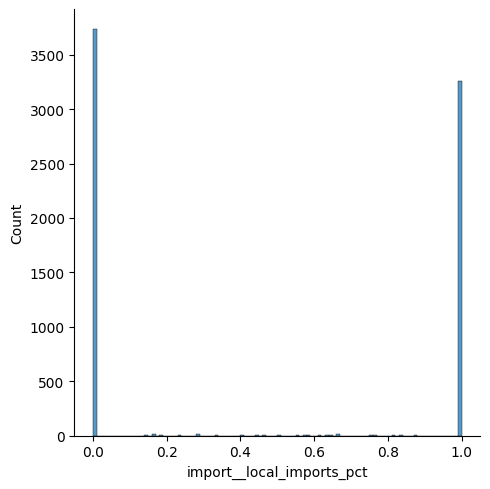

In [29]:
sns.displot(X['import__local_imports_pct'], bins=[i / 100 for i in range(0, 101)])

In [30]:
print_outliers_for_df_column(X, 'import__local_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.03826946020126343
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-1.3119597312469706,2.748123538461704]
-3.0IQR: 0 instancias tienen un valor para import__local_imports_pct inferior a -3.0 (Q1-3*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__local_imports_pct inferior a -1.5 (Q1-1.5*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__local_imports_pct superior a 2.5 (Q3+1.5*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__local_imports_pct superior a 4.0 (Q3-3*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valo

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [31]:
X[(X['import__local_imports_pct'] < 1.0) & X['import__local_imports_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,11.651515,0.461776,0.909091,0.538224,1.987753,0.045545,0.491805
std,7.788212,0.265143,0.288575,0.265143,1.192392,0.065466,0.219653
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
25%,7.000000,0.285714,1.000000,0.294118,1.166667,0.000000,0.285714
50%,9.000000,0.447619,1.000000,0.552381,1.500000,0.000000,0.500000
75%,14.000000,0.705882,1.000000,0.714286,2.250000,0.100000,0.666667
max,34.000000,1.000000,1.000000,1.000000,6.000000,0.222222,0.875000


### IMPORTANTE
El 52% tienen un 0% y el 46% tienen un 100%.

## Multivariate

Isolation forest algorithm

In [32]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level
442,31,0.806452,1.0,0.193548,1.166667,0.142857,0.16129,BEGINNER
2044,4,0.250000,3.0,0.750000,1.000000,0.666667,0.00000,BEGINNER
2085,4,0.250000,3.0,0.750000,1.000000,0.666667,0.00000,BEGINNER
2156,4,0.250000,3.0,0.750000,1.000000,0.666667,0.00000,BEGINNER
4282,31,0.806452,1.0,0.193548,1.166667,0.142857,0.16129,BEGINNER
4834,31,0.806452,1.0,0.193548,1.166667,0.142857,0.16129,BEGINNER
5539,31,0.806452,1.0,0.193548,1.166667,0.142857,0.16129,BEGINNER
6201,31,0.806452,1.0,0.193548,1.166667,0.142857,0.16129,BEGINNER
6827,31,0.806452,1.0,0.193548,1.166667,0.142857,0.16129,BEGINNER


### IMPORTANTE
Revisar las 9 identificadas como outliers.

In [33]:
#Non - Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include=['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
import__number_imports,7115.0,3.383134,5.220168,0.0,0.0,1.0,4.000000,46.0
import__module_imports_pct,7115.0,0.303892,0.386872,0.0,0.0,0.0,0.571429,1.0
import__average_imported_modules,7115.0,0.502961,0.577699,0.0,0.0,0.0,1.000000,6.0
import__from_imports_pct,7115.0,0.326326,0.397451,0.0,0.0,0.0,0.687500,1.0
import__average_from_imported_modules,7115.0,0.795662,1.163680,0.0,0.0,0.0,1.111111,8.0
import__average_as_in_imported_modules,7115.0,0.009350,0.060194,0.0,0.0,0.0,0.000000,1.0
import__local_imports_pct,7115.0,0.467034,0.495291,0.0,0.0,0.0,1.000000,1.0


In [34]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include=['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
import__number_imports,9.0,22.000000,13.500000,4.000000,4.000000,31.000000,31.000000,31.000000
import__module_imports_pct,9.0,0.620968,0.278226,0.250000,0.250000,0.806452,0.806452,0.806452
import__average_imported_modules,9.0,1.666667,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000
import__from_imports_pct,9.0,0.379032,0.278226,0.193548,0.193548,0.193548,0.750000,0.750000
import__average_from_imported_modules,9.0,1.111111,0.083333,1.000000,1.000000,1.166667,1.166667,1.166667
import__average_as_in_imported_modules,9.0,0.317460,0.261905,0.142857,0.142857,0.142857,0.666667,0.666667
import__local_imports_pct,9.0,0.107527,0.080645,0.000000,0.000000,0.161290,0.161290,0.161290
